Basic EDA

Source - https://www.kaggle.com/mathchi/churn-for-bank-customers
By - https://www.linkedin.com/in/rishabh-kuletha-195375179/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv("E:\kaggle\Churn\churn.csv")

In [3]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#observations:
    1. No null values
    2. Few columns, to be removed
    3. Categorical variable can be visualized by Countplot
    4. Numerical variable can be visualized by distplot
    5. A correlation matrix can be created for better understanding.


In [5]:
#dropping Rownumber, custID and Surname, Irrelevant for analysis
churn_data.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)

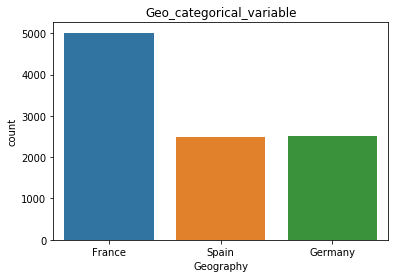

<Figure size 432x288 with 0 Axes>

In [6]:
#Visualizing Geography(cat_var)
sns.countplot(churn_data["Geography"])
plt.title("Geo_categorical_variable")
plt.show()
plt.clf()

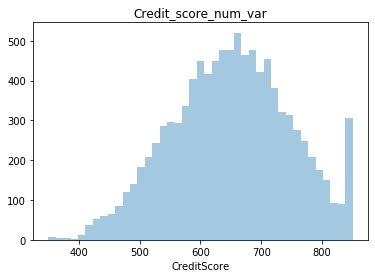

<Figure size 432x288 with 0 Axes>

In [7]:
# Visualizing CreditScore(Numerical_var)
sns.distplot(churn_data["CreditScore"], kde=False)
plt.title("Credit_score_num_var")
plt.show()
plt.clf()

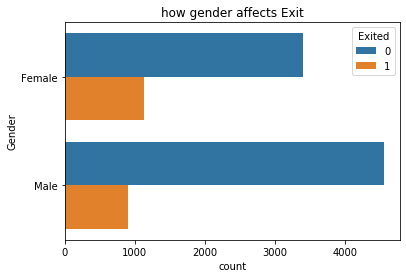

<Figure size 432x288 with 0 Axes>

In [8]:
#Visualizing the Effect of a Categorical Variable(gender) on the Exited Variable
sns.countplot(y = churn_data["Gender"], hue = churn_data["Exited"])
plt.title("how gender affects Exit")
plt.show()
plt.clf()

In [9]:
# Average 
ages = churn_data.groupby(churn_data["Exited"])["Age"].mean()
print("How age affects exit \n")
print("The average age of customer, who left the bank is", round(ages[0], 2), "years old. \n")
print("The average age of customer, who is still with the bank is", round(ages[1], 2), "years old. \n")


How age affects exit 

The average age of customer, who left the bank is 37.41 years old. 

The average age of customer, who is still with the bank is 44.84 years old. 



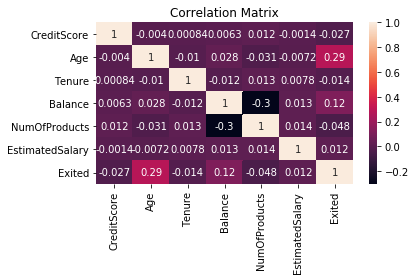

<Figure size 432x288 with 0 Axes>

In [10]:
# Correlation Matrix
var_list = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
sns.heatmap(churn_data[var_list].corr(), annot = True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
plt.clf()